# Simulating Virus Replication and Drug Resistance
This notebook illustrates the function of the simulation. First we test the code and then we run some simulations
## Code tests
### `Virus` class tests

In [1]:
import random
from script import *
import numpy as np

maxBirthProb = random.random()
clearProb = random.random()
virus = SimpleVirus(maxBirthProb, clearProb)

viruses = []
maxPop = random.random()
patient = Patient(viruses, maxPop)

#### Test: SimpleVirus 1
Initialize a SimpleVirus that is never cleared and always reproduces

In [2]:
v1 = SimpleVirus(1.0, 0.0)
popDensity = 0
for _ in range(10):
    try:
        v1.reproduce(popDensity)
        print(f"v1.doesClear(): {v1.doesClear() == True}")
    except NoChildException:
        print("Oops!")
# Test completed.

v1.doesClear(): False
v1.doesClear(): False
v1.doesClear(): False
v1.doesClear(): False
v1.doesClear(): False
v1.doesClear(): False
v1.doesClear(): False
v1.doesClear(): False
v1.doesClear(): False
v1.doesClear(): False


#### Test: SimpleVirus 2
Initialize a SimpleVirus that is never cleared and never reproduces

In [3]:
v1 = SimpleVirus(0.0, 0.0)
popDensity = 0
for _ in range(10):
    try:
        v1.reproduce(popDensity)
        print("Oops!")
    except NoChildException:
        print(f"v1.doesClear(): {v1.doesClear() == True}")
# Test completed.

v1.doesClear(): False
v1.doesClear(): False
v1.doesClear(): False
v1.doesClear(): False
v1.doesClear(): False
v1.doesClear(): False
v1.doesClear(): False
v1.doesClear(): False
v1.doesClear(): False
v1.doesClear(): False


#### Test: SimpleVirus 3
Initialize a SimpleVirus that is always cleared and always reproduces

In [4]:
v1 = SimpleVirus(1.0, 1.0)
popDensity = 0
for _ in range(10):
    try:
        v1.reproduce(popDensity)
        print(f"v1.doesClear(): {v1.doesClear() == True}")
    except NoChildException:
        print("Oops!")
# Test completed.

v1.doesClear(): True
v1.doesClear(): True
v1.doesClear(): True
v1.doesClear(): True
v1.doesClear(): True
v1.doesClear(): True
v1.doesClear(): True
v1.doesClear(): True
v1.doesClear(): True
v1.doesClear(): True


#### Test: SimpleVirus 4
Initialize a SimpleVirus that is always cleared and never reproduces

In [5]:
v1 = SimpleVirus(0.0, 1.0)
popDensity = 0
for _ in range(10):
    try:
        v1.reproduce(popDensity)
    except NoChildException:
        print(f"v1.doesClear(): {v1.doesClear() == True}")
# Test completed.

v1.doesClear(): True
v1.doesClear(): True
v1.doesClear(): True
v1.doesClear(): True
v1.doesClear(): True
v1.doesClear(): True
v1.doesClear(): True
v1.doesClear(): True
v1.doesClear(): True
v1.doesClear(): True


#### Test: SimpleVirus 5
Initialize a SimpleVirus with randomized probabilities

In [6]:
v1 = SimpleVirus(0.96, 0.45)
popDensity = 0.02
for _ in range(10):
    try:
        v1.reproduce(popDensity)
        print("Reproduced succesfully")
    except NoChildException:
        print("Oops!")
# Test completed.
    


Reproduced succesfully
Reproduced succesfully
Reproduced succesfully
Reproduced succesfully
Reproduced succesfully
Oops!
Reproduced succesfully
Reproduced succesfully
Reproduced succesfully
Reproduced succesfully


### `Patient` class tests
#### Test: class Patient 1
Initialize a Patient with randomized viruses

In [7]:
viruses = [SimpleVirus(0.02, 0.95), SimpleVirus(0.65, 0.3), SimpleVirus(0.66, 0.66), SimpleVirus(0.98, 0.35)]
P1 = Patient(viruses, 7)
print(P1.getTotalPop() == 4)  # True

True


#### Test: class Patient 2
Create a Patient with virus that is never cleared and always reproduces

In [8]:
virus = SimpleVirus(1.0, 0.0)
patient = Patient([virus], 100)
# Updating the patient for 100 trials...
for _ in range(100):
    patient.update()
# patient.getTotalPop() expected to be >= 100
patient.getTotalPop() >= 100  # True
# Test successfully completed

True

#### Test: class Patient 3
Create a Patient with virus that is always cleared and always reproduces

In [9]:
virus = SimpleVirus(1.0, 1.0)
patient = Patient([virus], 100)
# Updating the patient for 100 trials...
for _ in range(100):
    patient.update()
# patient.getTotalPop() expected to = 0
patient.getTotalPop() == 0  # True
# Test successfully completed

True

#### Test: class Patient 4
Initialize a Patient with randomized viruses

In [10]:
viruses = [ SimpleVirus(0.34, 0.76) ]
P1 = Patient(viruses, 8)
print(P1.getTotalPop() == 1)  # True
for _ in range(10):
    P1.update()
    print(len(P1.viruses) < P1.maxPop)
# Test Completed

True
True
True
True
True
True
True
True
True
True
True


### Testing simulations with simple viruses (no drug resistance)
#### Test: simulation 1

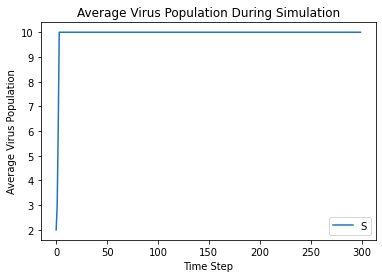

Pass


In [11]:
try:
    simulationWithoutDrug(1, 10, 1.0, 0.0, 1)
    # xdata, ydata = plt.gcf().get_axes()[0].get_lines()[0].get_data()  # Works in IDE, but not Jupyter Notebook
    print("Pass")
except:
    print("Fail")

#### Test: simulation 2

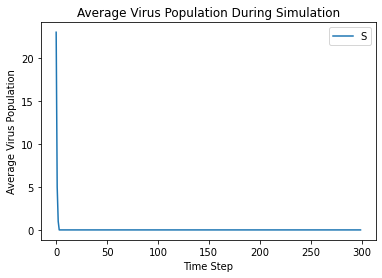

Pass


In [12]:
try:
    simulationWithoutDrug(100, 200, 0.2, 0.8, 1)
    # xdata, ydata = plt.gcf().get_axes()[0].get_lines()[0].get_data()
    print("Pass")
except:
    print("Fail")

#### Test: simulation 3

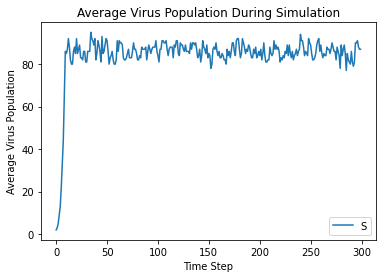

Pass


In [13]:
try:
    simulationWithoutDrug(1, 90, 0.8, 0.1, 1)
    # xdata, ydata = plt.gcf().get_axes()[0].get_lines()[0].get_data()
    print("Pass")
except:
    print("Fail")

### `ResistantVirus` class tests
#### Test: ResistantVirus 0
Create a ResistantVirus that is never cleared and always reproduces.

In [14]:
virus = ResistantVirus(1.0, 0.0, {}, 0.0)
# Testing update() and doesClear(); virus should not be cleared and should always reproduce.
r1 = []
r2 = []
numTests = 100
for _ in range(numTests):
    r1.append(virus.doesClear() == False)
    try:
        virus.reproduce(0, [])
        r2.append(True)
    except NoChildException:
        r2.append(False)
r1 = np.array(r1)
print(f"Does virus never clear? {r1.sum() == numTests}")  # True
r2 = np.array(r2)
print(f"Does the virus always reproduce? {r2.sum() == numTests}")  # True
    

Does virus never clear? True
Does the virus always reproduce? True


#### Test: Resistant Virus 1
Create a ResistantVirus that is never cleared and never reproduces.

In [15]:
virus = ResistantVirus(0.0, 0.0, {}, 0.0)
# Testing update() and doesClear(); virus should not be cleared and should never reproduce.
r1 = []
r2 = []
numTests = 100
for _ in range(numTests):
    r1.append(virus.doesClear() == False)
    try:
        virus.reproduce(0, [])
        r2.append(False)
    except NoChildException:
        r2.append(True)
r1 = np.array(r1)
print(f"Does virus never clear? {r1.sum() == numTests}")  # True
r2 = np.array(r2)
print(f"Does the virus never reproduce? {r2.sum() == numTests}")  # True

Does virus never clear? True
Does the virus never reproduce? True


#### Test: Resistant Virus 2
Create a ResistantVirus that is always cleared and always reproduces.

In [16]:
virus = ResistantVirus(1.0, 1.0, {}, 0.0)
# Testing update() and doesClear(); virus should always be cleared and should always reproduce.
r1 = []
r2 = []
numTests = 100
for _ in range(numTests):
    r1.append(virus.doesClear() == True)
    try:
        virus.reproduce(0, [])
        r2.append(True)
    except NoChildException:
        r2.append(False)
r1 = np.array(r1)
print(f"Does virus never clear? {r1.sum() == numTests}")  # True
r2 = np.array(r2)
print(f"Does the virus never reproduce? {r2.sum() == numTests}")  # True

Does virus never clear? True
Does the virus never reproduce? True


#### Test: Resistant Virus 3
Create a ResistantVirus that is always cleared and never reproduces.

In [17]:
virus = ResistantVirus(0.0, 1.0, {}, 0.0)
# Testing update() and doesClear(); virus should always be cleared and should never reproduce.
r1 = []
r2 = []
numTests = 100
for _ in range(numTests):
    r1.append(virus.doesClear() == True)
    try:
        virus.reproduce(0, [])
        r2.append(False)
    except NoChildException:
        r2.append(True)
r1 = np.array(r1)
print(f"Does virus always clear? {r1.sum() == numTests}")  # True
r2 = np.array(r2)
print(f"Does the virus never reproduce? {r2.sum() == numTests}")  # True

Does virus always clear? True
Does the virus never reproduce? True


#### Test: Resistant Virus 4 to 9
...

In [18]:
pass

### `TreatedPatient` class tests

In [19]:
# Tests 1 to 6

### Testing simulations with drug-resistant viruses
Run the three tests below and see if they match the results from edx.

In [20]:
# Test: simulation 1
# Test: simulationWithDrug(1, 10, 1.0, 0.0, {}, 1.0, 5)

# Test: simulation 2
# Test: simulationWithDrug(1, 20, 1.0, 0.0, {"guttagonol": True}, 1.0, 5)

# Test: simulation 3
# Test: simulationWithDrug(75, 100, .8, 0.1, {"guttagonol": True}, 0.8, 1)

## Sandbox Simulations
Define our own parameters to run a simulation